In [1]:
# ipython magic

# %reset -f
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [1]:
import os
import time
import sys
sys.path.append('..')
sys.path.append(r'C:\Users\Robert Lees\Documents\Code\Vape\rob_suite2p')
# sys.path.append(r'C:\Users\Robert Lees\Documents\Code\suite2p')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import utils.interareal_combined_class as iac
import pickle
import tifffile as tf
from scipy import spatial, stats

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\suite2p']


2019-11-15_J064
Fetching paths and stim types for: 2019-11-15_J064
Umbrella folder: Q:\Data\2019-11-15
Experimental info = (array(['Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-007',
       'Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_NAPARM\\2019-11-15_J064_NAPARM_003',
       'Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-007.paq'],
      dtype='<U84'), array(['Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-006',
       'Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_NAPARM\\2019-11-15_J064_NAPARM_002',
       'Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-006.paq'],
      dtype='<U84'), array(['Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-003',
       'none',
       'Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-003.paq'],
      dtype='<U84'), array(['Q:\\Data\\2019-11-15\\2019-11-15_J064\\2019-11-15_J064_t-004',
       'none', 'none'], dtype='<U84'))

Obtaining metadata for pr stim: Q:\Data\2019-1

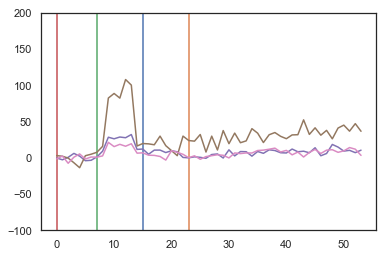

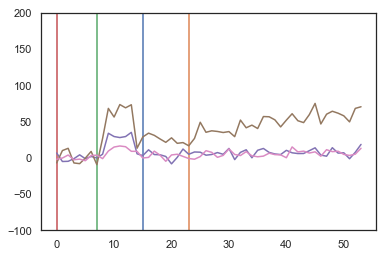

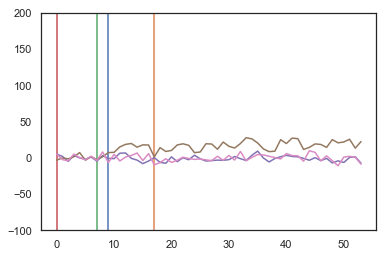

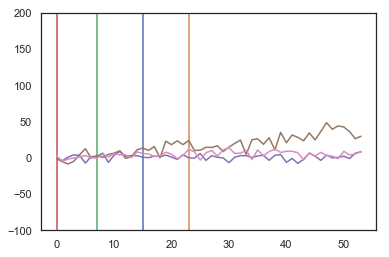

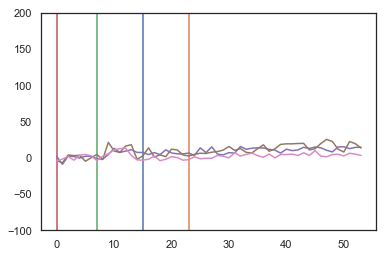

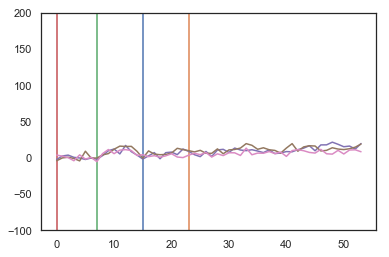

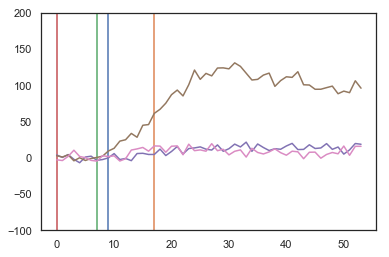

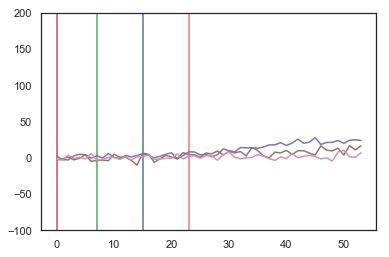

In [4]:
# Run experiments through analysis pipeline using metadata from Google Sheets

ss_id = '1PgSXs6BVHe9dACWEydykucN74rirNfOY4Vr_AmLcCdY'
sheet_names = [
#                '2019-06-11_J048',
#                '2019-06-13_J052',
#                '2019-06-25_RL048',
#                '2019-07-15_RL052',
#                '2019-08-14_J058',
#                '2019-08-14_J059',
#                '2019-08-15_RL055',
#                '2019-11-14_J061',
#                '2019-11-14_J063',
#                '2019-11-15_J064',
#                '2019-11-18_J065'
              ]

qnap_path = r'Q:\Data'
pkl_folder = r'Q:\pkl_files'

for sheet_name in sheet_names:
    
    # Initialise the class
    exp_obj = iac.experimentInfo(ss_id, sheet_name, qnap_path)
    
    # Run s2p on this experiment (if not already done)
#     exp_obj.s2pRun()
    
    # Get the range of frames that are attributed to each experiment (from the concatenated t-series)
    exp_obj.getFrameRanges()
    
    # Process the s2p data (after manual curation)
    exp_obj.photostim_r.s2pProcessing()
    exp_obj.photostim_s.s2pProcessing()
    exp_obj.whisker_stim.s2pProcessing()
    
    # Add sham photostim metadata
    exp_obj.spont.stim_start_frames = exp_obj.photostim_r.stim_start_frames
    exp_obj.spont.naparm_path = exp_obj.photostim_r.naparm_path
    exp_obj.spont.spiral_size = exp_obj.photostim_r.spiral_size 
    exp_obj.spont.duration_frames = exp_obj.photostim_r.duration_frames
    exp_obj.spont.stim_dur = exp_obj.photostim_r.stim_dur
    exp_obj.spont.single_stim_dur = exp_obj.photostim_r.single_stim_dur
    exp_obj.spont.n_shots = exp_obj.photostim_r.n_shots
    exp_obj.spont.n_groups = exp_obj.photostim_r.n_groups
    exp_obj.spont.n_trials = exp_obj.photostim_r.n_trials
    exp_obj.spont.inter_point_delay = exp_obj.photostim_r.inter_point_delay
    
    exp_obj.spont.s2pProcessing()
    
    # Pickle the object output to save it for analysis
    pkl_path = os.path.join(pkl_folder, sheet_name + '.pkl')
    
    with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)

In [111]:
# Add new attributes to all exp_obj pkl files if necessary

# pkl_folder = r'Q:\pkl_files'

# for pkl in os.listdir(pkl_folder):
    
#     pkl_path = os.path.join(pkl_folder, pkl)
    
#     with open(pkl_path, 'rb') as f:
#         exp_obj = pickle.load(f)
        
#     exp_obj.spont.n_trials = exp_obj.photostim_r.n_trials
    
#     with open(pkl_path, 'wb') as f:
#         pickle.dump(exp_obj, f)

In [16]:
# Re-create master object from scratch listing information from all experiments

pkl_folder = r'Q:\pkl_files'

master_obj = iac.interarealPlotting(pkl_folder)

master_path = r'Q:\master_pkl\master_obj.pkl'

with open(master_path, 'wb') as f:
    pickle.dump(master_obj, f)

Q:\pkl_files\2019-06-11_J048.pkl
Q:\pkl_files\2019-06-13_J052.pkl
Q:\pkl_files\2019-06-25_RL048.pkl
Q:\pkl_files\2019-07-15_RL052.pkl
Q:\pkl_files\2019-08-14_J058.pkl
Q:\pkl_files\2019-08-14_J059.pkl
Q:\pkl_files\2019-08-15_RL055.pkl
Q:\pkl_files\2019-11-14_J061.pkl
Q:\pkl_files\2019-11-14_J063.pkl
Q:\pkl_files\2019-11-15_J064.pkl
Q:\pkl_files\2019-11-18_J065.pkl


In [113]:
# See the variables that are attributed to the master object

vars(master_obj)

{'pkl_folder': 'Q:\\pkl_files',
 'pkl_name': ['2019-06-11_J048.pkl',
  '2019-06-13_J052.pkl',
  '2019-06-25_RL048.pkl',
  '2019-07-15_RL052.pkl',
  '2019-08-14_J058.pkl',
  '2019-08-14_J059.pkl',
  '2019-08-15_RL055.pkl',
  '2019-11-14_J061.pkl',
  '2019-11-14_J063.pkl',
  '2019-11-15_J064.pkl',
  '2019-11-18_J065.pkl'],
 'pkl_path': ['Q:\\pkl_files\\2019-06-11_J048.pkl',
  'Q:\\pkl_files\\2019-06-13_J052.pkl',
  'Q:\\pkl_files\\2019-06-25_RL048.pkl',
  'Q:\\pkl_files\\2019-07-15_RL052.pkl',
  'Q:\\pkl_files\\2019-08-14_J058.pkl',
  'Q:\\pkl_files\\2019-08-14_J059.pkl',
  'Q:\\pkl_files\\2019-08-15_RL055.pkl',
  'Q:\\pkl_files\\2019-11-14_J061.pkl',
  'Q:\\pkl_files\\2019-11-14_J063.pkl',
  'Q:\\pkl_files\\2019-11-15_J064.pkl',
  'Q:\\pkl_files\\2019-11-18_J065.pkl'],
 'n_units': [1158,
  1158,
  421,
  421,
  609,
  609,
  491,
  491,
  379,
  379,
  348,
  348,
  348,
  464,
  464,
  464,
  694,
  694,
  694,
  709,
  709,
  709,
  1081,
  1081,
  1081,
  780,
  780,
  780],
 'n_targ

In [2]:
# Add new pickle files to the master object

# master_obj.addPickles()

# with open(master_path, 'wb') as f:
#     pickle.dump(master_obj, f)

NameError: name 'master_obj' is not defined

['C:\\ProgramData\\Anaconda3\\lib\\site-packages\\suite2p']
Plotting summary statistic for all experiments: target_sta_amp
Plotting summary statistic for all experiments: positive_s2_responders_sta
Plotting stimulus triggered average for all experiments: target_sta


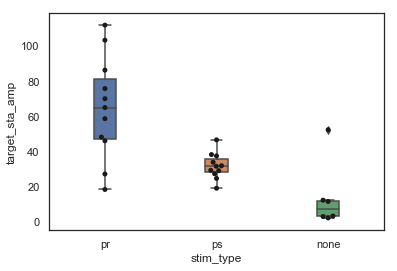

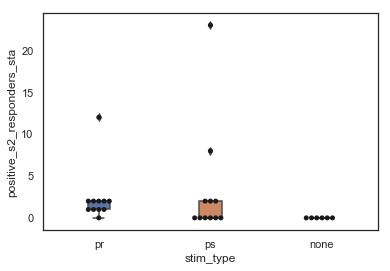

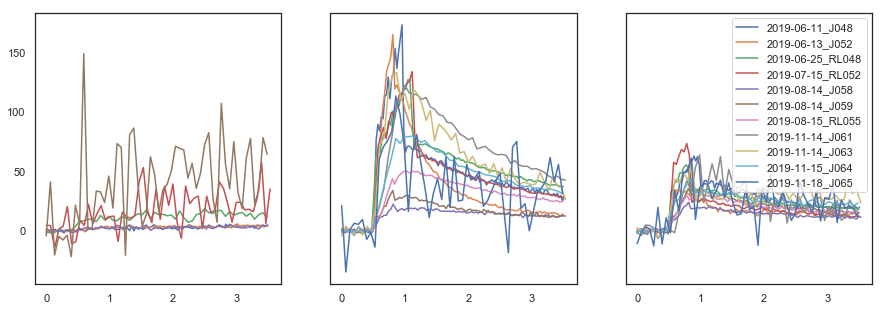

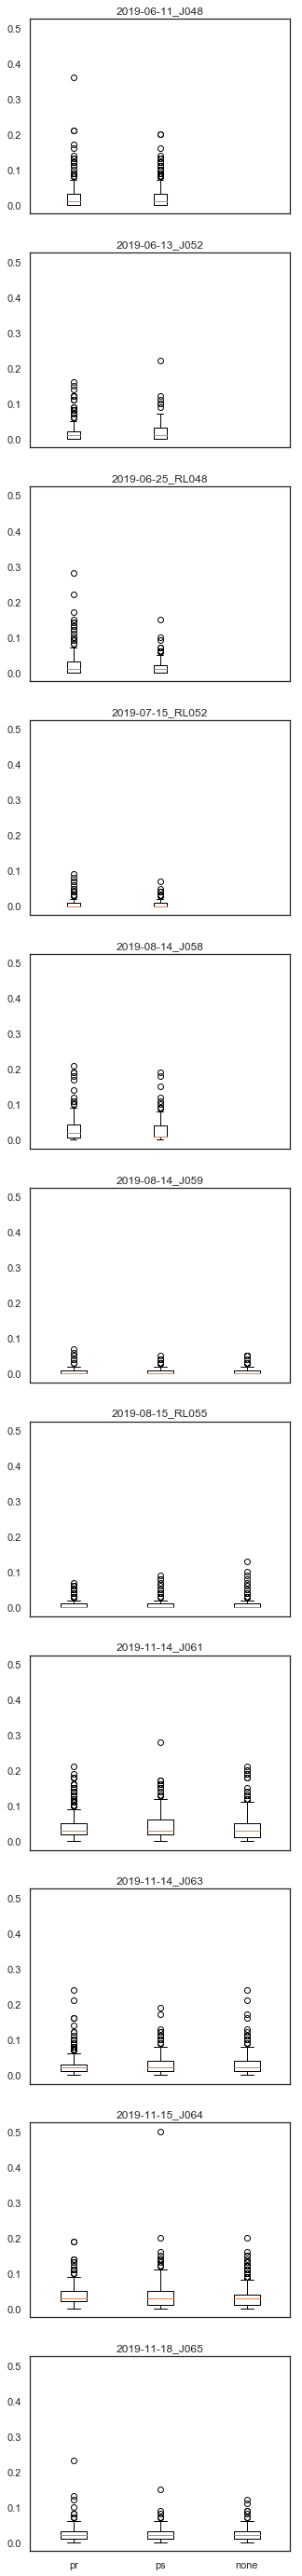

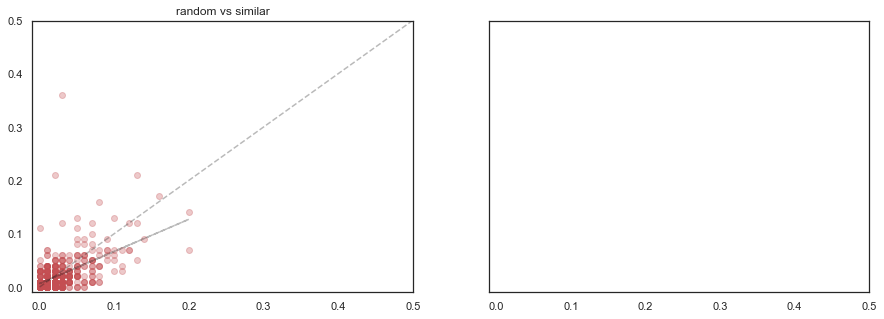

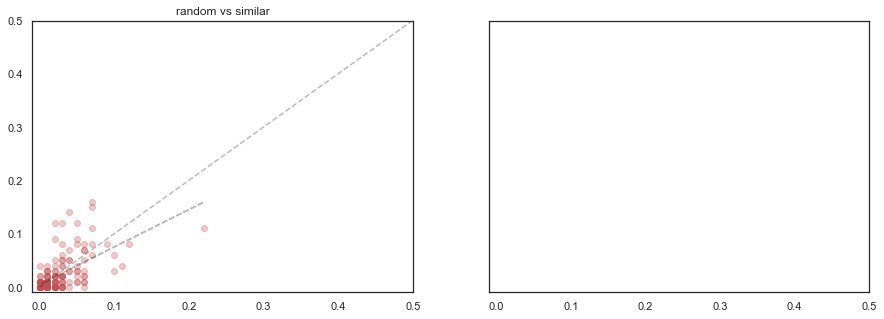

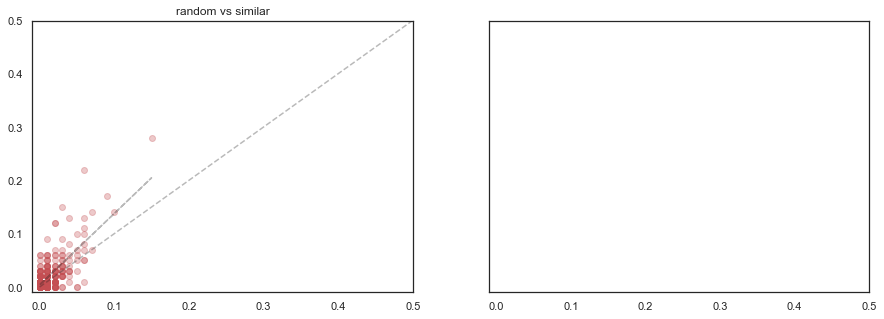

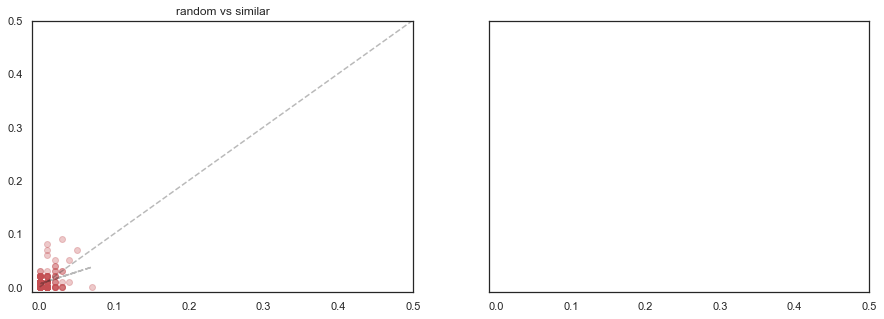

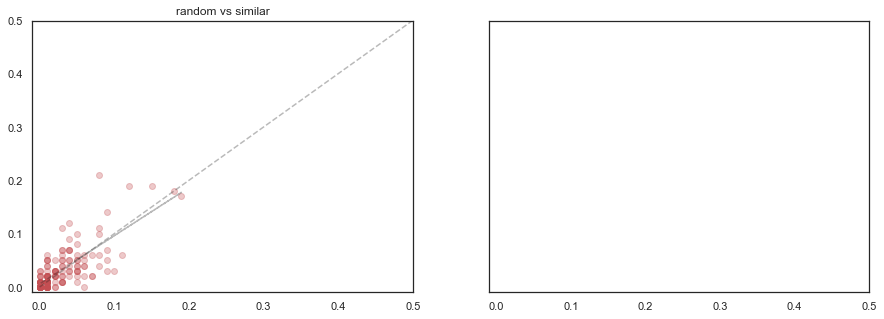

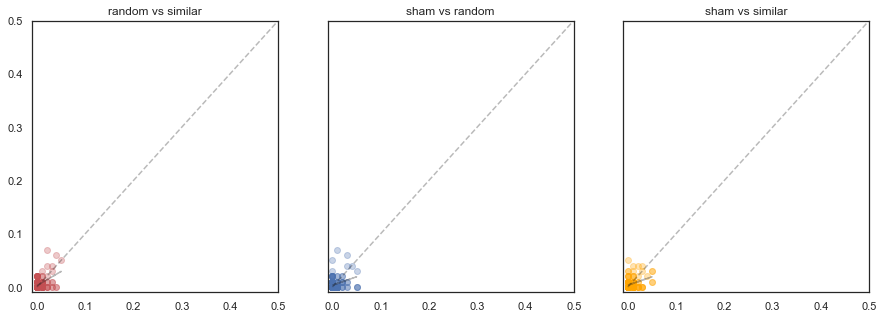

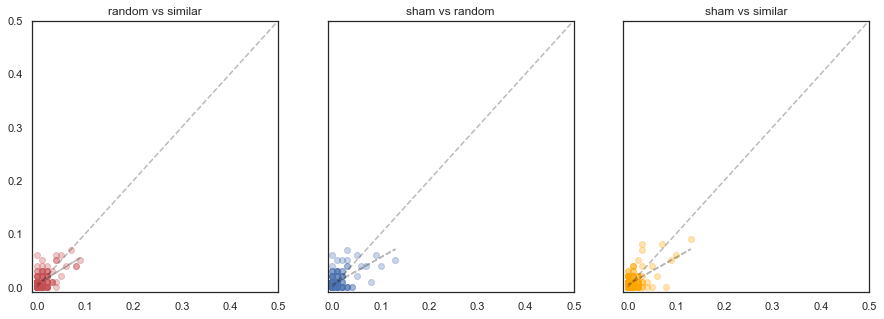

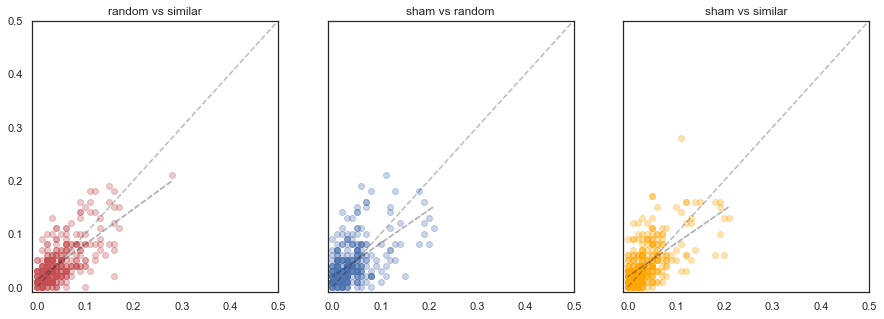

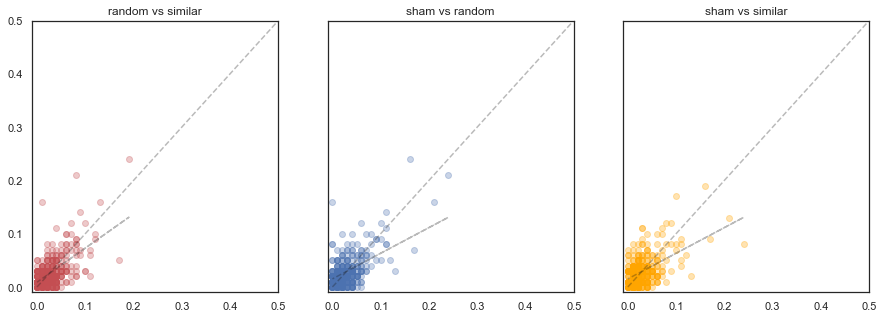

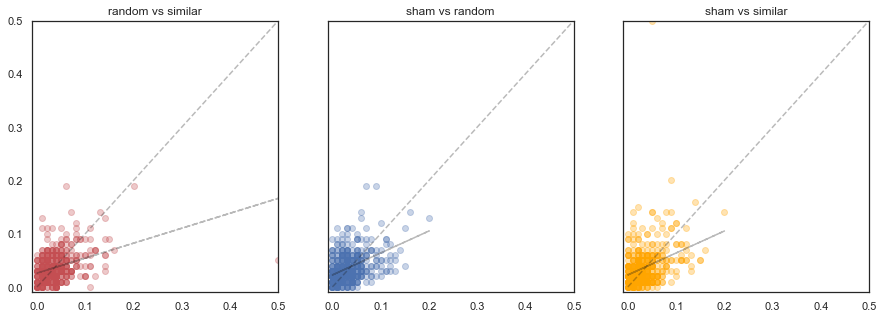

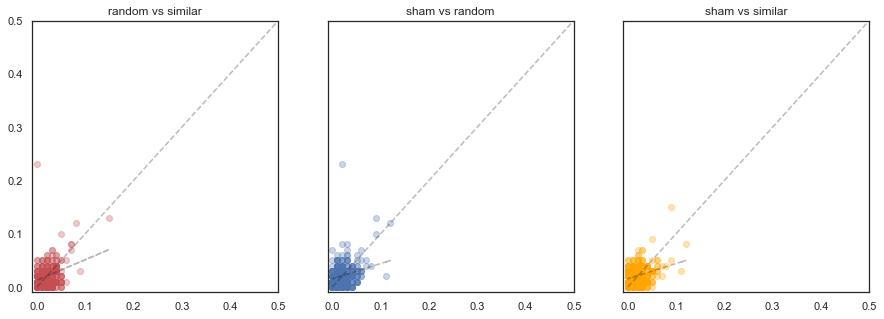

In [24]:
# Plot summary statistics and other analytics

master_path = r'Q:\master_pkl\master_obj.pkl'

with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)
    
save_path = r'C:\Users\Robert Lees\Documents\PackerPostdoc\Lab meetings\2020-01-08_joint_data_presentation\Media'

#Plot mean STA dFF amplitude across all cells in group
master_obj.boxplotSummaryStat('target_sta_amp')
# plt.savefig(os.path.join(save_path, 'target_sta_amp.svg'))
# master_obj.boxplotSummaryStat('non_target_sta_amp')
# master_obj.boxplotSummaryStat('s2_sta_amp')
master_obj.boxplotSummaryStat('positive_s2_responders_sta')
# plt.savefig(os.path.join(save_path, 'positive_s2_responders_sta.svg'))

# Plot mean STA dFF trace across all cells in group
master_obj.lineplotSTA('target_sta')
# plt.savefig(os.path.join(save_path, 'target_sta.svg'))
# master_obj.lineplotSTA('non_target_sta')
# master_obj.lineplotSTA('s2_sta')

# Plot probability of response for each stim separately for each animal
master_obj.boxplotProbResponse(to_mask='s1_cells')
plt.savefig(os.path.join(save_path, 'prob_response_boxplot.svg'))

# Plot probability of response for each cell across two different stim types
master_obj.scatterProbResponse(to_mask='s1_cells')
plt.savefig(os.path.join(save_path, 'prob_response_scatter.svg'))

# Plot reliable responders over 100 trials (STA)
# master_obj.scatterResponseSTA(['target_responders_sta', 'positive_s2_responders_sta'], proportion=True)
# master_obj.scatterResponseSTA(['positive_s1_responders_sta', 'positive_s2_responders_sta'], proportion=True)

# Plot all responders per trial (> 2 S.D. of baseline)
# master_obj.scatterResponseTrial(['target_responders_trial', 'positive_s2_responders_trial'])
# master_obj.scatterResponseTrial(['target_responders_trial', 'positive_s1_responders_trial'])
# master_obj.scatterResponseTrial(['positive_s1_responders_trial', 'positive_s2_responders_trial'], proportion=True)
# master_obj.scatterResponseTrial(['positive_s1_responders_trial', 'positive_s2_responders_trial'])

In [2]:
# Make STA movie

master_path = r'Q:\master_pkl\master_obj.pkl'

with open(master_path, 'rb') as f:
    master_obj = pickle.load(f)

pkl_list = [
            r"Q:\pkl_files\2019-11-14_J061.pkl"
#             r"Q:\pkl_files\2019-11-14_J063.pkl",
#             r"Q:\pkl_files\2019-11-15_J064.pkl",
#             r"Q:\pkl_files\2019-11-18_J065.pkl"
           ]

master_obj.staMovie(pkl_list)


Making STA movie for: Q:\Data\2019-11-14\2019-11-14_J061\2019-11-14_J061_t-002


MemoryError: 

In [18]:
# Play with dataframes from master object

# master_path = r'Q:\master_pkl\master_obj.pkl'

# with open(master_path, 'rb') as f:
#     master_obj = pickle.load(f)

df = master_obj.df
df

,sheet_name,tiff_path,stim_type,fps,n_units,n_targets,n_targeted_cells,target_cells,s1_cells,stim_dur,...,negative_s1_responders_sta,positive_s2_responders_sta,negative_s2_responders_sta,positive_s1_responders_sta_nomulti,negative_s1_responders_sta_nomulti,positive_s2_responders_sta_nomulti,negative_s2_responders_sta_nomulti,target_responders_sta,target_responders_sta_nomulti,prob_response
0,2019-06-11_J048,2019-06-11_J048_t-005,pr,36.778513,1158,50,91,"[False, False, False, False, False, False, Tru...","[True, False, False, False, False, True, True,...",445.0,...,40,1,1,89,150,29,39,76,81,"[0.16, 0.12, 0.04, 0.05, 0.06, 0.07, 0.05, 0.3..."
1,2019-06-11_J048,2019-06-11_J048_t-006,ps,36.778513,1158,23,61,"[False, False, False, False, False, False, Tru...","[True, False, False, False, False, True, True,...",445.0,...,4,0,0,174,27,88,2,44,52,"[0.05, 0.13, 0.05, 0.06, 0.09, 0.2, 0.13, 0.03..."
2,2019-06-13_J052,2019-06-13_J052_t-004,pr,30.974703,421,123,66,"[True, False, False, True, False, False, False...","[True, False, True, True, True, True, False, F...",595.0,...,7,2,1,38,26,34,5,49,53,"[0.2, 0.12, 0.14, 0.04, 0.24, 0.26, 0.11, 0.04..."
3,2019-06-13_J052,2019-06-13_J052_t-005,ps,30.576645,421,40,31,"[True, False, False, True, False, False, False...","[True, False, True, True, True, True, False, F...",235.0,...,0,0,0,63,3,83,0,18,25,"[0.79, 0.05, 0.11, 0.1, 0.25, 0.22, 0.07, 0.11..."
4,2019-06-25_RL048,2019-06-24_RL048_t-005,pr,29.759712,609,100,73,"[False, False, False, False, False, False, Fal...","[False, False, False, True, False, False, Fals...",595.0,...,16,12,6,83,33,59,36,60,62,"[0.22, 0.09, 0.1, 0.03, 0.08, 0.03, 0.05, 0.17..."
5,2019-06-25_RL048,MPTIFF,ps,29.759712,609,34,28,"[False, False, False, False, False, False, Fal...","[False, False, False, True, False, False, Fals...",295.0,...,1,8,0,87,10,66,10,21,23,"[0.06, 0.01, 0.05, 0.04, 0.04, 0.03, 0.03, 0.0..."
6,2019-07-15_RL052,2019-07-15_RL052_t-007,pr,24.289858,491,89,65,"[True, False, False, True, True, False, False,...","[True, False, True, True, True, True, False, T...",595.0,...,11,1,0,59,46,21,4,49,55,"[0.09, 0.07, 0.07, 0.03, 0.02, 0.01, 0.07, 0.0..."
7,2019-07-15_RL052,2019-07-15_RL052_t-008,ps,24.289858,491,38,26,"[True, False, False, True, True, False, False,...","[True, False, True, True, True, True, False, T...",295.0,...,1,0,0,75,8,26,1,16,21,"[0.01, 0.05, 0.01, 0.3, 0.02, 0.01, 0.01, 0.07..."
8,2019-08-14_J058,2019-08-14_J058_t-008,pr,28.352889,379,26,21,"[False, False, False, False, True, False, Fals...","[True, False, False, False, True, True, True, ...",310.0,...,2,0,0,62,19,14,5,12,16,"[0.03, 0.03, 0.02, 0.03, 0.2, 0.09, 0.02, 0.09..."
9,2019-08-14_J058,2019-08-14_J058_t-007,ps,28.352889,379,18,19,"[False, False, False, False, True, False, Fals...","[True, False, False, False, True, True, True, ...",295.0,...,2,2,0,53,13,45,0,13,15,"[0.05, 0.05, 0.07, 0.1, 0.01, 0.05, 0.05, 0.16..."


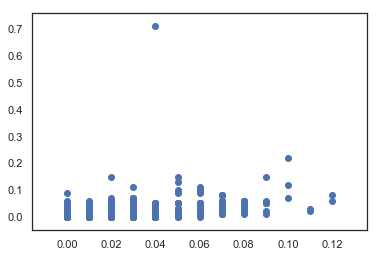

In [10]:
# Test data to play with experimental objects

pkl_path = r"Q:\pkl_files\2019-11-18_J065.pkl"

with open(pkl_path, 'rb') as f:
    exp_obj = pickle.load(f)

# with open(pkl_path, 'wb') as f:
#     pickle.dump(exp_obj, f)

In [ ]:
# Recreate STA postage of cells

# Maybe make the STA movie from the frames that are relevant, adding it to the first stack. 
# I.e. Load stack 1, add stack 2... add stack n and then divide by the number of trials to get the STA
# Save the STA for later cropping using ROIs

# Alternatively for each trial (as an additional argument) look at the postage stamp for that trial
# to see if it look like a cell increasing in intensity

pkl_folder = r'P:\rlees\pkl_files'
plane = 0

# Need to find bounding box of cell from x and y pix extremes and make a border around that to crop STA
# ORIGIN = top-left, y = 0, x = 0

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        print(exp_obj.tiff_path)
        
        try:
            output_dir = os.path.join(exp_obj.tiff_path, 'targ_cells_dff')
            os.mkdir(output_dir)
        except:
            print('Could not make directory.')
            
        for trial in range(exp_obj.n_trials):

            for cell,_ in enumerate(exp_obj.cell_id[0]):

                if exp_obj.targeted_cells[cell]==1 and exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0:
#                 if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 20:

                    min_x = np.min(exp_obj.cell_x[plane][cell])
                    max_x = np.max(exp_obj.cell_x[plane][cell])
                    width_cell = max_x - min_x

                    min_y = np.min(exp_obj.cell_y[plane][cell])
                    max_y = np.max(exp_obj.cell_y[plane][cell])
                    height_cell = max_y - min_y

                    bd_x_start = (min_x - 10)
                    bd_width = width_cell + 20
                    bd_x_stop = bd_x_start + bd_width
                    
                    if bd_x_start < 0:
                        bd_x_start = 0
                        
                    if bd_x_stop > exp_obj.frame_x:
                        bd_x_stop = exp_obj.frame_x
                        
                    bd_y_start = (min_y - 10)
                    bd_height = height_cell + 20
                    bd_y_stop = bd_y_start + bd_height
                    
                    if bd_y_start < 0:
                        bd_y_start = 0
                        
                    if bd_y_stop > exp_obj.frame_y:
                        bd_y_stop = exp_obj.frame_y

                    frame_start = exp_obj.stim_start_frames[plane][trial]
                    trial_start = frame_start - exp_obj.pre_frames
                    trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                    for file in os.listdir(exp_obj.tiff_path):
                        if '.tif' in file:
                            tiff_file = os.path.join(exp_obj.tiff_path, file)
                            trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                            trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                            baseline_avg = np.mean(trial_baseline, 0)

                            df_stack = trial_stack - baseline_avg
                            dff_stack = df_stack/baseline_avg * 100
                            dff_stack = dff_stack.astype('uint32')

                            cell_stack = dff_stack[-10:,bd_y_start:bd_y_stop, bd_x_start:bd_x_stop]
                            break

                    output_path = os.path.join(exp_obj.tiff_path, 'targ_cells_dff', file + '_plane' + str(plane) + '_cell' + str(cell) + '_trial' + str(trial) + '.tif')
                    tf.imwrite(output_path, cell_stack)

In [ ]:
# Make and save STA of trials where lots of S2 cells go off to see what is happening as sanity check

plane = 0
pkl_folder = r'P:\rlees\pkl_files'

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
        
        if any(s in pkl_path for s in ['random', 'sensory', 'sham']):
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            try:
                output_dir = os.path.join(exp_obj.tiff_path, 'sta_many_s2_cells')
                os.mkdir(output_dir)
            except:
                print('Could not make directory.')

            for trial in range(exp_obj.n_trials):

                s1_count = 0
                s2_count = 0

                for cell,_ in enumerate(exp_obj.cell_id[0]):

                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] < s2_border:
                        s1_count += 1

                    if exp_obj.single_sig[0][cell][trial] == True and exp_obj.all_amplitudes[0][cell][trial] > 0 and exp_obj.cell_med[0][cell][1] > s2_border:
                        s2_count += 1

                if s2_count > 20:

                    frame_start = exp_obj.stim_start_frames[plane][trial]
                    trial_start = frame_start - exp_obj.pre_frames
                    trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                    for file in os.listdir(exp_obj.tiff_path):
                        if '.tif' in file:
                            tiff_file = os.path.join(exp_obj.tiff_path, file)
                            trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                            trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                            baseline_avg = np.mean(trial_baseline, 0)

                            df_stack = trial_stack - baseline_avg
                            dff_stack = df_stack/baseline_avg * 100
                            dff_stack = dff_stack.astype('uint32')
#                             dff_stack = dff_stack[-10:,:,:]

                            break

                    output_path = os.path.join(output_dir, file + '_plane' + str(plane) + '_trial' + str(trial) + '_' + str(s2_count) + 'cells.tif')
                    tf.imwrite(output_path, dff_stack)
                    print(output_path)

In [ ]:
# Make STA of target location (see photostim resolution?)

pkl_folder = r'P:\rlees\pkl_files'
plane = 0

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
        
        with open(pkl_path, 'rb') as f:
            exp_obj = pickle.load(f)
        
        try:
            output_dir = os.path.join(exp_obj.tiff_path, 'targets_dff')
            os.mkdir(output_dir)
        except:
            print('Could not make directory.')
            
        for i,target in enumerate(exp_obj.target_coords):
            
            target_stack = np.empty((0,10,40,40), dtype=np.uint32)
            
            for trial in range(exp_obj.n_trials):
                
                bd_x_start = (target[0] - 10)
                bd_width = 40
                bd_x_stop = bd_x_start + bd_width

                bd_y_start = (target[1] - 10)
                bd_height = 40
                bd_y_stop = bd_y_start + bd_height

                frame_start = exp_obj.stim_start_frames[plane][trial]
                trial_start = frame_start - exp_obj.pre_frames
                trial_end = frame_start + exp_obj.pre_frames + int(exp_obj.stim_dur/exp_obj.fps)

                for file in os.listdir(exp_obj.tiff_path):
                    if '.tif' in file:
                        tiff_file = os.path.join(exp_obj.tiff_path, file)
                        trial_stack = tf.imread(tiff_file, key=range(trial_start,trial_end))

                        trial_baseline = trial_stack[: exp_obj.pre_frames, :, :]
                        baseline_avg = np.mean(trial_baseline, 0)

                        df_stack = trial_stack - baseline_avg
                        dff_stack = df_stack/baseline_avg * 100
                        dff_stack = dff_stack.astype('uint32')

                        crop_stack = dff_stack[-10:,bd_y_start:bd_y_stop, bd_x_start:bd_x_stop]
                        crop_stack = np.expand_dims(crop_stack, axis=0)
                        target_stack = np.append(target_stack, crop_stack, axis=0)
                        break

            output_path = os.path.join(exp_obj.tiff_path, 'targets_dff', file + '_plane' + str(plane) + '_target' + str(i) + '.tif')
            tf.imwrite(output_path, target_stack)

In [ ]:
# Find the proportion of targeted cells that responded (significantly) across trials,
# does it hover at same value or fluctuate?

all_prop_targ_resp = []
all_n_targ_resp = []
all_targ_amps = []

all_prop_s2_exc = []
all_n_s2_exc = []

all_prop_s2_inh = []
all_n_s2_inh = []

all_s2_amps = []

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)
        print(pkl_path)
                
        if any(s in pkl_path for s in ['random', 'sensory']):
#         if 'spont_sham' in pkl_path:
           
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)
        
            n_targeted_cells = len([x for x in exp_obj.targeted_cells if x == 1])

            n_s2_cells = len([x for y,x in exp_obj.cell_med[0][:] if x > s2_border])

            for trial in range(exp_obj.n_trials):
                num_targets_exc = len([i for i,target in enumerate(exp_obj.targeted_cells) if target == 1 and exp_obj.all_amplitudes[0][i][trial] > 0 and exp_obj.single_sig[0][i][trial]])
                proportion_targets = num_targets_exc/n_targeted_cells
                
                trial_targ_amps = [exp_obj.all_amplitudes[0][i][trial] for i,target in enumerate(exp_obj.targeted_cells) if target == 1 and exp_obj.single_sig[0][i][trial]]
                all_targ_amps.append(trial_targ_amps)
                
                all_prop_targ_resp.append(proportion_targets)
                all_n_targ_resp.append(num_targets_exc)

                num_s2_exc = len([i for i,_ in enumerate(exp_obj.cell_id[0]) if exp_obj.all_amplitudes[0][i][trial] > 0 and exp_obj.single_sig[0][i][trial] and exp_obj.cell_med[0][i][1] > s2_border])
                proportion_s2_exc = num_s2_exc/n_s2_cells
                num_s2_inh = len([i for i,_ in enumerate(exp_obj.cell_id[0]) if exp_obj.all_amplitudes[0][i][trial] < 0 and exp_obj.single_sig[0][i][trial] and exp_obj.cell_med[0][i][1] > s2_border])
                proportion_s2_inh = num_s2_inh/n_s2_cells
                
                trial_s2_amps = [exp_obj.all_amplitudes[0][i][trial] for i in range(exp_obj.n_units[0]) if exp_obj.single_sig[0][i][trial] and exp_obj.cell_med[0][i][1] > s2_border]
                all_s2_amps.append(trial_s2_amps)
                
                all_prop_s2_exc.append(proportion_s2_exc)
                all_prop_s2_inh.append(proportion_s2_inh)
                all_n_s2_exc.append(num_s2_exc)
                all_n_s2_inh.append(num_s2_inh)

In [ ]:
#plot number of exc/inh in cells over trials 

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        y = all_n_s2_inh[i:i+100]
        x = all_n_targ_resp[i:i+100]
        col.scatter(x, y, c='b', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'b')
        
        y = all_n_s2_exc[i:i+100]
        x = all_n_targ_resp[i:i+100]
        col.scatter(x, y, c='r', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'r')
        
        col.set_xlim((0,65))
        col.set_ylim((0,80))
        i+=100

In [ ]:
#plot proportion of exc/inh in cells over trials 

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = all_prop_targ_resp[i:i+100]
        y = all_prop_s2_inh[i:i+100]
        col.scatter(x, y, c='b', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'b')
        
        x = all_prop_targ_resp[i:i+100]
        y = all_prop_s2_exc[i:i+100]
        col.scatter(x, y, c='r', alpha=0.5)
        
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),'r')
        
        col.set_xlim((0,1))
        col.set_ylim((0,.45))
        i+=100

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,15))

i=0

for row in ax:
    for col in row:
        x = all_targ_amps[i:i+100]
        y = all_s2_amps[i:i+100]

        x_mean = [np.sum(sublist) for sublist in x]
        y_mean = [np.sum(sublist) for sublist in y]
        
        col.scatter(x_mean, y_mean, c='k', alpha=0.5)

        # calc the trendline
        z = np.polyfit(x_mean, y_mean, 1)
        p = np.poly1d(z)
        col.plot(x_mean,p(x_mean),'k')
        
        col.set_xlim((-100,7000))
        col.set_ylim((-2000,7500))
        i+=100

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

i=0

exc_norm_x = []
exc_norm_y = []
inh_norm_x = []
inh_norm_y = []

# for row in ax:
#     for col in row:
for session in range(14):
    x = all_n_targ_resp[i:i+100]
    y = all_n_s2_inh[i:i+100]
    
    max_x = np.max(x)
    min_x = np.min(x)
    max_y = np.max(y)
    min_y = np.min(y)

    x = (x-min_x)/max_x
    y = (y-min_y)/max_y

    ax[0].scatter(x, y, c='b', alpha=0.75)
    
    exc_norm_x.extend(x)
    exc_norm_y.extend(y)
    
    x = all_n_targ_resp[i:i+100]
    y = all_n_s2_exc[i:i+100]
    
    max_x = np.max(x)
    min_x = np.min(x)
    max_y = np.max(y)
    min_y = np.min(y)

    x = (x-min_x)/max_x
    y = (y-min_y)/max_y
    
    ax[1].scatter(x, y, c='r', alpha=0.75)

    inh_norm_x.extend(x)
    inh_norm_y.extend(y)

    i+=100

In [ ]:
# plot sta excitation and inhibition in space 

pkl_folder = r'P:\rlees\pkl_files'

plt.figure()

all_amps = []
all_dists = []
all_x = []
all_y = []

for root, dirs, files in os.walk(pkl_folder):
    for file in files:
        pkl_path = os.path.join(pkl_folder, file)

#         if 'spont_sham' in pkl_path:
        if any(s in pkl_path for s in ['random', 'sensory']):

            print(pkl_path)
            
            with open(pkl_path, 'rb') as f:
                exp_obj = pickle.load(f)

            followers = []

            for cell in range(exp_obj.n_units[0]):
                cell_coord = exp_obj.cell_med[0][cell]

                if exp_obj.targeted_cells[cell]==0:
                    followers.append(([cell_coord[1],cell_coord[0]], exp_obj.sta_amplitudes[0][cell]))
            
            tree = spatial.KDTree(exp_obj.target_coords)
            
            norm_x = []
            norm_y = []
            amps = []
            dists = []

            for coord, amp in followers:
                dist, index = tree.query(coord)
                x,y = np.subtract(coord, exp_obj.target_coords[index])
                norm_x.append(x)
                norm_y.append(y)
                amps.append(amp)         
                dists.append(dist)
                        
            x_um = [x*exp_obj.pix_sz_x for x in norm_x]
            y_um = [y*exp_obj.pix_sz_y for y in norm_y]
            sc = plt.scatter(x_um, y_um, c=amps, cmap='RdBu_r', vmin=-5, vmax=5, alpha=0.5, linewidth=0)
            plt.axis('equal')
#             plt.xlim((-150,150))
#             plt.ylim((-150,150))
            plt.xlabel('Cortical distance (um)')
        
            all_amps.extend(amps)
            all_dists.extend(np.absolute(dists))
            all_x.extend(x_um)
            all_y.extend(y_um)
            
cb = plt.colorbar(sc)
cb.set_label('dFF %')

In [ ]:
# Want to bin all coordinates in to 10x10 um chunks
# Make bins relevant to the max coords? Max x and y
# Use np.digitize to get the coords 

def binned_amplitudes_2d(all_x, all_y, all_amps):
    all_amps_real = np.nan_to_num(all_amps)
    denominator, xedges, yedges = np.histogram2d(all_x, all_y, bins=50)
    nominator, _, _ = np.histogram2d(all_x, all_y, bins=50, weights=all_amps_real)
    h = nominator/denominator
    Y, X = np.meshgrid(xedges, yedges)
    
    plt.figure()
    plt.pcolormesh(X, Y, h, cmap='RdBu_r', vmin=-5, vmax=5)
    plt.xlabel('Cortical distance (um)')
    
    cb = plt.colorbar()
    cb.set_label('dFF %')

In [ ]:
indices = [i for i,amp in enumerate(all_amps) if amp > 0]
x = [x for i,x in enumerate(all_x) if i in indices]
y = [y for i,y in enumerate(all_y) if i in indices]
pos_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

binned_amplitudes_2d(x, y, pos_amps)

indices = [i for i,amp in enumerate(all_amps) if amp < 0]
x = [x for i,x in enumerate(all_x) if i in indices]
y = [y for i,y in enumerate(all_y) if i in indices]
neg_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

binned_amplitudes_2d(x, y, neg_amps)

binned_amplitudes_2d(all_x, all_y, all_amps)

In [ ]:
def binned_amplitudes_1d(all_dists,all_amps,bins):
    indices = np.digitize(all_dists, bins)

    binned_amps = []

    for i,_ in enumerate(bins):
        binned_dists = np.where(indices == i)[0]

        if np.shape(binned_dists)[0] > 0:
            amps = [amp for i,amp in enumerate(all_amps) if i in binned_dists]
            mean_amp = np.mean(amps)
            binned_amps.append(mean_amp)
        else:
            binned_amps.append(0)
    
    return binned_amps

In [ ]:
x = range(0,700,10)
x_um = [x*1.313 for x in x]

indices = [i for i,amp in enumerate(all_amps) if amp > 0]
dists = [dist for i,dist in enumerate(all_dists) if i in indices]
pos_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

pos_binned_amps = binned_amplitudes_1d(dists, pos_amps, x)

plt.figure()
plt.plot(x_um[2:-10], pos_binned_amps[2:-10], c='r', label = 'excitation')

indices = [i for i,amp in enumerate(all_amps) if amp < 0]
dists = [dist for i,dist in enumerate(all_dists) if i in indices]
neg_amps = [amp for i,amp in enumerate(all_amps) if i in indices]

neg_binned_amps = binned_amplitudes_1d(dists, neg_amps, x)

plt.plot(x_um[2:-10], neg_binned_amps[2:-10], c='b', label = 'inhibition')

sum_amps = np.add(neg_binned_amps, pos_binned_amps)
plt.plot(x_um[2:-10], sum_amps[2:-10], c='k', label = 'sum')
plt.xlabel('Cortical distance (um)')
plt.ylabel('Change in fluorescence (dFF)')
plt.legend();

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = range(100)
        y = all_prop_s2_exc[i*100:i*100+100]
        col.scatter(x, y, c='r', alpha=.2)
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),"r", lw=2)
        col.set_ylim((0,0.2))
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slope = np.around(slope, decimals=4)
        r_value = np.around(r_value, decimals=2)
        col.text(70, 0.1, 'Slope: ' + str(slope) + '\nr: ' + str(r_value)) 
        i+=1

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = range(100)
        y = all_prop_s2_inh[i*100:i*100+100]
        col.scatter(x, y, c='b', alpha=.2)
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),"b", lw=2)
        col.set_ylim((0,0.2))
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slope = np.around(slope, decimals=4)
        r_value = np.around(r_value, decimals=2)
        col.text(70, 0.1, 'Slope: ' + str(slope) + '\nr: ' + str(r_value)) 
        i+=1

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(10,20))

i=0

for row in ax:
    for col in row:
        x = range(100)
        y = all_prop_targ_resp[i*100:i*100+100]
        col.scatter(x, y, c='k', alpha=.2)
        # calc the trendline
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        col.plot(x,p(x),"k", lw=2)
        col.set_ylim((0,1))
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        slope = np.around(slope, decimals=4)
        r_value = np.around(r_value, decimals=2)
        col.text(70, 0.8, 'Slope: ' + str(slope) + '\nr: ' + str(r_value)) 
        i+=1

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(exp_obj.mean_img[0], 'gray')